# background

BOCI (bakso aci) is a typical meatball made by starch. What make it interesting is not the _boci_ itself, it is because there are a lot of meatball types in one bowl but the name of the menu is _boci_. In Indonesia, there are lots of street seller tries to sell _boci_, especially in West Java and Jakarta. Because its popularity, one of my friends try to make profit of it by selling boci.

When I ask, how much do you earn per day? he said, "Not sure to answer it. Sometimes 60, sometimes 70, sometimes 85 when the street is crowded."

"And how do you choose how many portion do you prepare per day?" I asked.

"I cannot answer it. Everyday I take IDR100K for my daily meals. And the rest of it is the capital for the next day."

He sells _boci_ from monday to friday. He works as a freelancer on weekends.

After discussion, I asked him to record the sales everyday for 90 days and include whether it is monday or else. I asked him also to see if the day he sells is raining or not. I have an intuition that there is something when it is raining. After 90 days, he gives me what he noted when he sold his _boci_.

disclaimer: _this data is a full fake dataset. this dataset is build using numpy random distribution generator for educational purpose only._

# library and dataset

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as s

In [2]:
dataset = pd.read_csv('penjualan_boci.csv')
dataset.drop(dataset.columns[0], axis=1, inplace=True)
dataset.head()

,date,weather,day,sales
0,2024-01-01,sunny,Monday,79.0
1,2024-01-02,rainy,Tuesday,80.0
2,2024-01-03,rainy,Wednesday,84.0
3,2024-01-04,rainy,Thursday,78.0
4,2024-01-05,sunny,Friday,83.0


# data cleaning

In [9]:
dataset.isna().sum()

weather    0
day        0
sales      0
dtype: int64

there is no missing data. so we can continue.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     90 non-null     object 
 1   weather  90 non-null     object 
 2   day      90 non-null     object 
 3   sales    90 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.9+ KB


the column date is till object. it's better to convert into date and make it into our index.

In [4]:
dataset.index = pd.to_datetime(dataset.date)
dataset = dataset.drop(['date'], axis=1)
dataset.head()

,weather,day,sales
date,,,
2024-01-01,sunny,Monday,79.0
2024-01-02,rainy,Tuesday,80.0
2024-01-03,rainy,Wednesday,84.0
2024-01-04,rainy,Thursday,78.0
2024-01-05,sunny,Friday,83.0


it's nice now. let's find something interesting!

# exploration data analysis

In [5]:
print(dataset['weather'].describe())

count        90
unique        2
top       rainy
freq         46
Name: weather, dtype: object


there are 90 records with two unique values. rain appears frequently 46 times.

In [6]:
print(dataset['day'].describe())

count         90
unique         5
top       Monday
freq          18
Name: day, dtype: object


i guess it is not relevant since he did not have off day.

In [7]:
print(dataset['sales'].describe().round(3))

count    90.000
mean     79.311
std       5.335
min      68.000
25%      76.000
50%      79.000
75%      83.000
max      92.000
Name: sales, dtype: float64


so far, he can make it 68 portion or more per day. that is nice. the biggest achievement for him is selling 92 portion in a day. the 50% of sales lies between 76 and 83. the average is 79 and the center of sales lie on 79. i have a feeling that this sales follows gaussian distribution.

let's visualize using boxplot to understand the data easily.

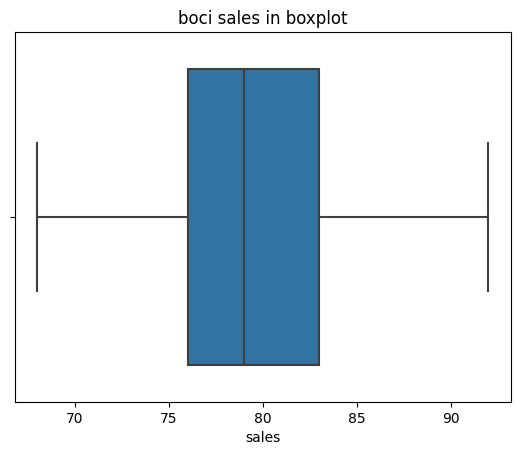

In [8]:
sns.boxplot(x=dataset.sales)
plt.title('boci sales in boxplot')
plt.show()

from the viz, we can see that the 50% of the data lies on the blue square.

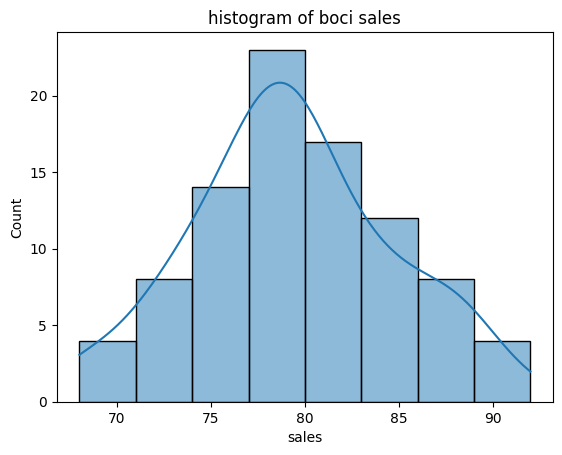

In [14]:
sns.histplot(dataset.sales, kde=True)
plt.title('histogram of boci sales')
plt.show()

outliers are data values which are extremely far from data distributin. there are two ways to see if there are otliers:
1. from boxplot iqr
2. from $3*std$ from the mean

In [44]:
min_value = dataset['sales'].min()
max_value = dataset['sales'].max()
std_value = dataset['sales'].std()
mean_value = dataset['sales'].mean()
q3 = np.percentile(dataset['sales'], 75)
q1 = np.percentile(dataset['sales'], 25)
iqr = q3-q1

In [52]:
iqr_min_threshold = q1-(1.5*iqr)
iqr_max_threshold = q3+(1.5*iqr)
std_min_threshold = mean_value-(std_value*3)
std_max_threshold = mean_value+(std_value*3)

In [49]:
def outliers_detection(value, threshold, check):
    if check == 'min':
        if value < threshold:
            print(f"there is ouliers detected in {check} value")
        else:
            print(f"there is no ouliers detected in {check} value")
    elif check == 'max':
        if value > threshold:
            print(f"there is ouliers detected in {check} value")
        else:
            print(f"there is no ouliers detected in {check} value")

In [54]:
print('outliers from iqr')
outliers_detection(min_value, iqr_min_threshold, check='min')
outliers_detection(max_value, iqr_max_threshold, check='max')
print("")
print('outliers from std')
outliers_detection(min_value, std_min_threshold, check='min')
outliers_detection(min_value, std_max_threshold, check='max')

outliers from iqr
there is no ouliers detected in min value
there is no ouliers detected in max value

outliers from std
there is no ouliers detected in min value
there is no ouliers detected in max value
